<a href="https://colab.research.google.com/github/Eduardo3-Medina/TelecomX/blob/main/informeFinalTelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción:**
La tasa de cancelación de clientes, conocida como churn, es un indicador clave para las empresas de telecomunicaciones, ya que refleja la pérdida de suscriptores y su impacto directo en los ingresos. Este análisis tiene como objetivos:

1. Identificar las variables más relevantes asociadas al abandono de clientes.

2. Detectar patrones de comportamiento que influyen en la decisión de cancelación.

3. Proponer estrategias orientadas a reducir la tasa de churn y mejorar la retención.

El estudio se enfoca en las siguientes variables:

* Tenencia (antigüedad del cliente)

* Cargos mensuales y totales

* Facturación

* Tipo de contrato

* Servicios adicionales (soporte técnico, internet)

#**Limpieza y Tratamiento de Datos:**
1. *Importación y Unificación de Datos*
El conjunto de datos proviene de un archivo JSON denominado TelecomX_Data.json, estructurado en varias secciones anidadas:

Datos del cliente: customer (e.g., género, edad, dependencias).

Servicios telefónicos: phone (e.g., PhoneService, MultipleLines).

Servicios de internet: internet (e.g., InternetService, OnlineSecurity, etc.).

Información de cuenta: account (e.g., Contract, PaperlessBilling).

Datos de facturación: Charges (e.g., Monthly, Total).
import pandas as pd
from pandas import json_normalize

# Carga y normalización de datos anidados
df = pd.read_json(ruta_json)
customer_df = json_normalize(df['customer'])
phone_df = json_normalize(df['phone'])

# Unificación en un único DataFrame
df_final = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df, charges_df], axis=1)

2. *Selección y Validación de Columnas*
Se seleccionaron únicamente las columnas relevantes para el análisis del Churn, priorizando variables demográficas, de servicios y de facturación.

columnas_deseadas = [
    'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'TechSupport',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]
Validaciones realizadas:

Datos nulos:

print(df_final.isnull().sum())  # Verificación de valores faltantes

Datos duplicados:

print(df_final['customerID'].duplicated().sum())  # Identificación de IDs repetidos

3. *Transformación y Normalización de Datos*

**Conversión de Tipos de Datos**

*Variables numéricas:*

df_final['SeniorCitizen'] = df_final['SeniorCitizen'].astype(int)
df_final['tenure'] = df_final['tenure'].astype(int)
df_final['Charges.Monthly'] = pd.to_numeric(df_final['Charges.Monthly'], errors='coerce').fillna(0)

*Variables categóricas binarias (convertidas a booleanos)*:

df_final['Partner'] = df_final['Partner'].astype(str).str.lower().map({'yes': True, 'no': False})
df_final['Churn'] = df_final['Churn'].apply(lambda x: True if x == 'Yes' else False)

*Variables categóricas textuales (normalizadas como cadenas):*

df_final['Contract'] = df_final['Contract'].astype("string")
df_final['PaymentMethod'] = df_final['PaymentMethod'].astype("string")

**Exportación del dataset limpio**

Para mejorar la eficiencia en almacenamiento y preservar los tipos de datos:
df_final.to_parquet("df_final_limpio.parquet")

4. *Integración con Streamlit (Visualización)*
El archivo limpio df_final_limpio.parquet es utilizado dentro de una aplicación interactiva desarrollada con Streamlit. Se destacan las siguientes visualizaciones y funciones:

**Histogramas dinámicos (Plotly):** Comparación entre variables y la variable objetivo Churn.

**Estadísticas descriptivas agrupadas:**
st.dataframe(df_final.groupby('Churn')['tenure'].agg(['mean', 'median']))



#**Análisis Exploratorio de Datos:**
1. **Variables Numéricas**
* *Tenencia (tenure)*

Los clientes con menos de 20 meses de antigüedad presentan mayor propensión al churn.

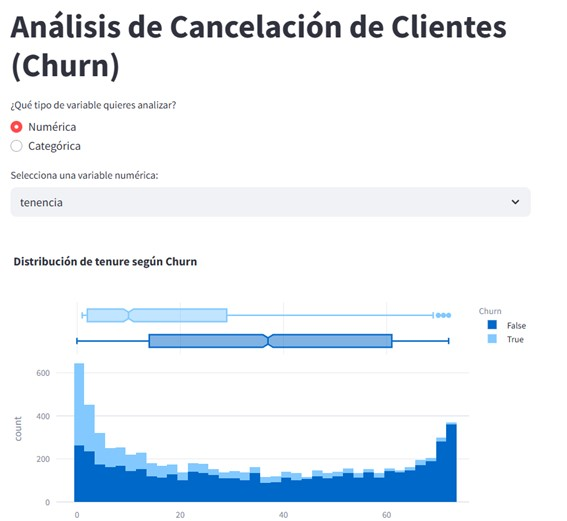
Se observa una relación inversa: a mayor tenencia, menor tasa de cancelación.

* *Cargos Mensuales (MonthlyCharges)*

Los usuarios con cargos superiores a $80 tienen una tasa de cancelación más alta.

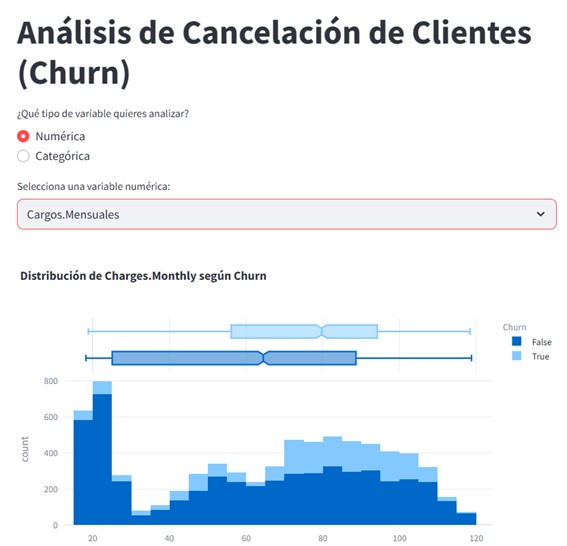

Posible vínculo con planes de fibra óptica, que suelen ser más costosos.

* *Cargos Totales (TotalCharges)*

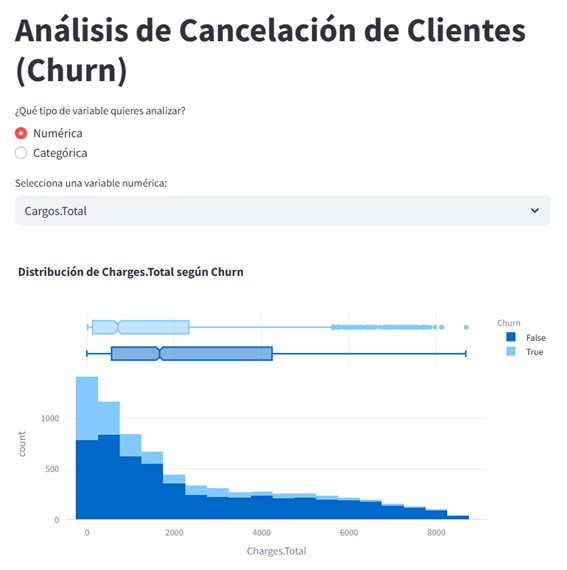

Los clientes con gastos acumulados menores a $2,000 tienden a abandonar con mayor frecuencia.

2. **Variables Categóricas**
* *Tipo de Contrato (Contract)*

Los contratos mensuales presentan la mayor tasa de churn, en comparación con los anuales o bienales.

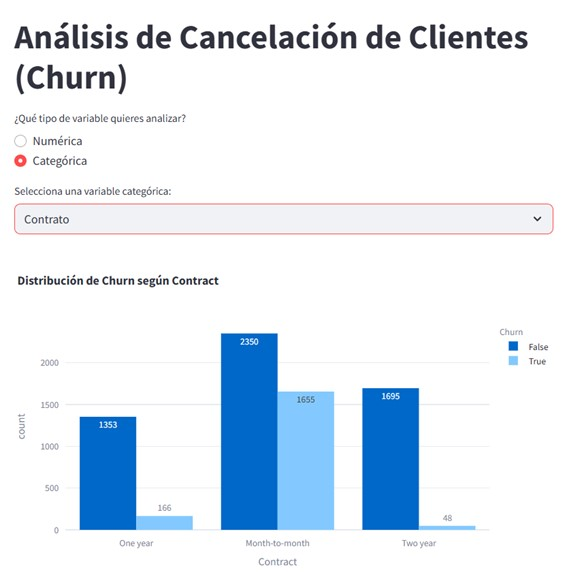

Recomendación: fomentar la adopción de contratos a largo plazo mediante incentivos.

* *Servicio de Internet (InternetService)*

Los usuarios de fibra óptica muestran mayor propensión a cancelar, frente a los de DSL o sin servicio de internet.

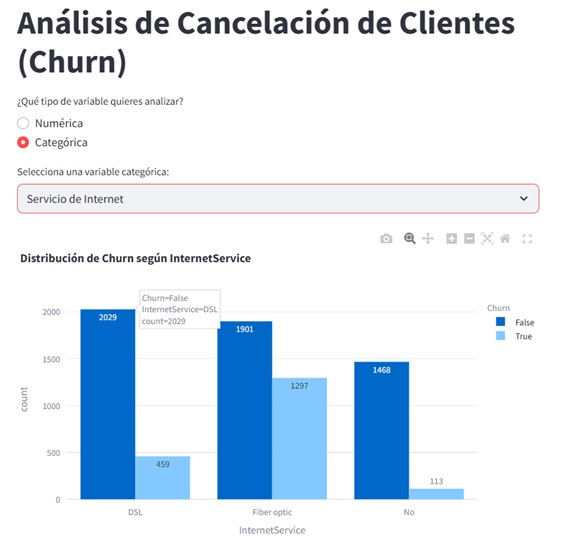

Posible causa: problemas de calidad del servicio o expectativas no satisfechas.

* *Soporte Técnico (TechSupport)*

Los clientes sin soporte técnico duplican la tasa de cancelación respecto a quienes sí cuentan con este servicio.

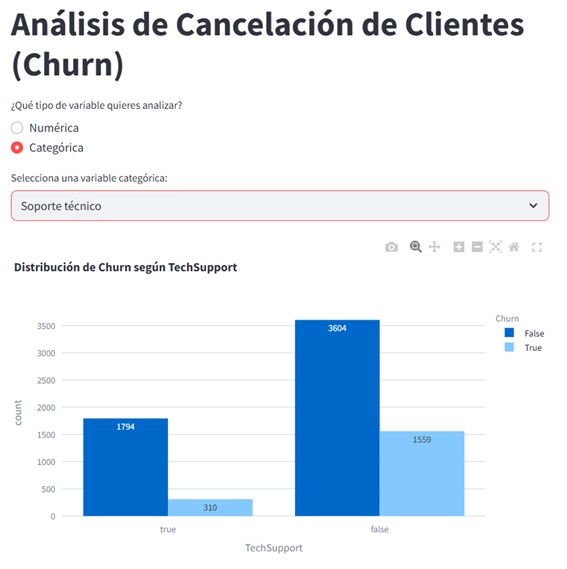

* *Facturación (PaperlessBilling)*

Los usuarios con facturación electrónica presentan mayor churn.

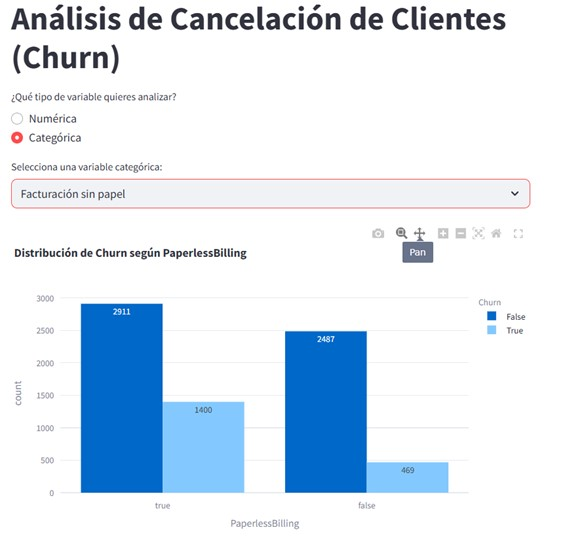

Hipótesis: dificultades en la experiencia digital o en la recepción de notificaciones.

#**Conclusiones e Insights:**
* ***Perfil de clientes con alto riesgo de churn:***

Contratos mensuales

Uso de fibra óptica

Sin soporte técnico

Antigüedad menor a 20 meses

Cargos mensuales elevados

* ***Factores que reducen la probabilidad de churn:***

Contratos anuales o bienales

Acceso a soporte técnico

Cargos totales elevados (clientes antiguos/leales)



#**Recomendaciones:**
1. ***Fidelización temprana***

Ofrecer beneficios o descuentos a clientes nuevos, especialmente durante los primeros 12 meses.

2. ***Mejora de servicios premium***

Revisar la calidad del servicio de fibra óptica.

Implementar soporte técnico proactivo para mejorar la experiencia del cliente.

3. ***Incentivos a contratos largos***

Promover planes anuales o bienales mediante bonificaciones y beneficios exclusivos.

4. ***Optimización de la facturación electrónica***

Asegurar la claridad de las notificaciones y habilitar canales efectivos de retroalimentación.

5. ***Programas de retención personalizados***

Utilizar modelos predictivos para identificar clientes en riesgo y contactarlos con ofertas personalizadas.